In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [61]:
data = pd.read_csv('./Advertising.csv')

In [62]:
# construct input and target values
data_arr = np.array(data); n = len(data_arr)
TV = data_arr[:,1].reshape(n,1)
Sales = data_arr[:,4].reshape(n,1)

In [63]:
# normalization of feature and target
x = np.c_[np.ones((n,1)),(TV-np.min(TV))/(np.max(TV)-np.min(TV))]
y = Sales

In [64]:

# split training and test set
m=190

x_train=x[:m]
y_train=y[:m]

x_test =x[m:]
y_test =y[m:]

In [65]:
# Gradient descent
# assing initial parameters 
w_gd=np.array([-1,-0.5]).reshape(2,1); lr = 0.01; misfit = 10; max_iteration = 500
print ('initial value of parameters:', w_gd)

initial value of parameters: [[-1. ]
 [-0.5]]


In [66]:
#estimate parameters theta for the advertising problem.
cos_func_val=np.zeros((max_iteration,1))

for i in range(max_iteration):
    thetax = x_train.dot(w_gd)
    #gradient of cost function
    grad = (1/m)*(np.transpose(x_train).dot(thetax-y_train))
    #update weight vectors
    w_gd = w_gd - lr*grad
    #calculate cost function during iteration for plotting
    cos_func_val[i] = (1/m)*(thetax-y_train).T.dot(thetax-y_train)
    
print('weight vectors:',w_gd)

weight vectors: [[10.11283407]
 [ 8.27183129]]


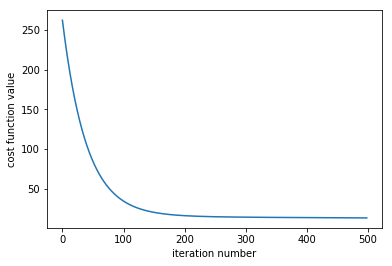

In [67]:
#Visualization
plt.plot(cos_func_val[0:i])
plt.xlabel('iteration number');plt.ylabel('cost function value')
plt.show()

In [68]:
#sale prediction 
pred_train = x_train.dot(w_gd)
pred_test= x_test.dot(w_gd)

In [69]:
#------Evaluation --------------

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


rmse_val_train = rmse(pred_train, y_train)
print("rms error for the training set is: " + str(rmse_val_train))

rmse_val_test = rmse(pred_test, y_test)
print("rms error for the test set is: " + str(rmse_val_test))


rms error for the training set is: 3.640345489368778
rms error for the test set is: 3.9085603448797355


In [70]:
# define batch_gradient_descent function based on Input and target values
def batch_gradient_descent(X,Y):
    # construct input and target values
    n = len(X)
    X_arr=np.array(X).reshape(n,1)
    y_arr=np.array(Y).reshape(n,1)
    # normalization of feature and target
    x = np.c_[np.ones((n,1)),(X_arr-np.min(X_arr))/(np.max(X_arr)-np.min(X_arr))]
    y = y_arr
    #split train test
    m=190
    x_train=x[:m]
    y_train=y[:m]
    x_test =x[m:]
    y_test =y[m:]
    # assing initial parameters 
    w_gd=np.array([-1,-0.5]).reshape(2,1); lr = 0.01; max_iteration = 500
    print ('initial value of parameters:', w_gd)
    cos_func_val=np.zeros((max_iteration,1))
    
    for i in range(max_iteration):
        thetax = x_train.dot(w_gd)
        #gradient of cost function
        grad = (1/m)*(np.transpose(x_train).dot(thetax-y_train))
        #update weight vectors
        w_gd = w_gd - lr*grad
        #calculate cost function during iteration for plotting
        cos_func_val[i] = (1/m)*(thetax-y_train).T.dot(thetax-y_train)

    print('weight vectors:',w_gd)
    
    plt.plot(cos_func_val[0:i])
    plt.xlabel('iteration number');plt.ylabel('cost function value')
    plt.show()
    
    pred_train = x_train.dot(w_gd)
    pred_test= x_test.dot(w_gd)
    #------Evaluation --------------
    def rmse(predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())
    
    rmse_val_train = rmse(pred_train, y_train)
    print("rms error for the training set is: " + str(rmse_val_train))
    
    rmse_val_test = rmse(pred_test, y_test)
    print("rms error for the test set is: " + str(rmse_val_test))
    return

In [71]:
data = pd.read_csv('./Advertising.csv')

initial value of parameters: [[-1. ]
 [-0.5]]
weight vectors: [[10.11283407]
 [ 8.27183129]]


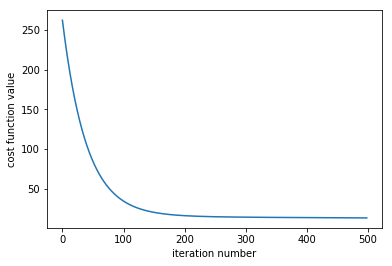

rms error for the training set is: 3.640345489368778
rms error for the test set is: 3.9085603448797355


In [72]:
batch_gradient_descent(data['TV'],data['Sales'])

initial value of parameters: [[-1. ]
 [-0.5]]
weight vectors: [[10.82212248]
 [ 7.01320058]]


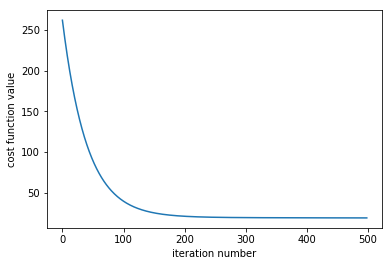

rms error for the training set is: 4.357323162371344
rms error for the test set is: 4.20042579511254


In [73]:
batch_gradient_descent(data['Radio'],data['Sales'])

initial value of parameters: [[-1. ]
 [-0.5]]
weight vectors: [[12.9666593 ]
 [ 3.83741415]]


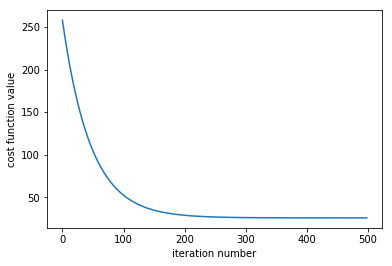

rms error for the training set is: 5.06890536639136
rms error for the test set is: 5.427909854899054


In [74]:
batch_gradient_descent(data['Newspaper'],data['Sales'])